In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing the dataset, index_col is for such that customer_id will be our indexing, 
df = pd.read_csv(r"/content/Mall_Customers (1).csv", index_col=0,header =0)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
print(df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe(include="all"))

(200, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
         Genre         Age  Annual Income (k$)  Spending Score (1-100)
count      200  200.000000          200.000000              200.000000
unique       2         NaN                 NaN                     NaN
top     Female         NaN                 NaN                     NaN
freq       112         NaN                 NaN                     NaN
mean       NaN   38.850000           60.

In [ ]:
# with help of loc and iloc it will create a value which we dont want so will subset it through index to convert without header into array. cause array are lighter are in wieight to build the model fasters
#x=df.iloc[:,[2,3]]
x = df.values[:,[2,3]]
print(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

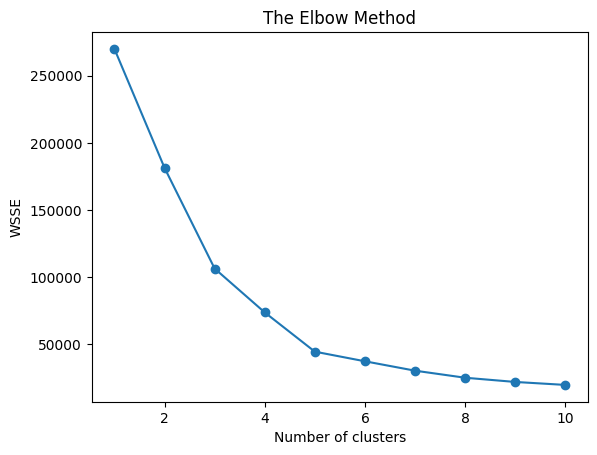

In [10]:
#using the elbow method to find the optimal number of clusters, n_cluster ----> hyperparameter, inertia is technical term which means at each value of k how much wsse we are getting.
from sklearn.cluster import KMeans

wsse = []
for i in range(1,11):
    Kmeans= KMeans(n_clusters=i, random_state=10)
    Kmeans.fit(x)
    wsse.append(Kmeans.inertia_)
plt.plot(range(1,11),wsse)
plt.scatter(range(1,11),wsse)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WSSE")
plt.show()    

In [11]:
# since the last elbow curve is on 5 it means k=5.
print(wsse)

[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37271.88623658949, 30273.394312070042, 25022.48500453035, 21881.878507060963, 19669.710998301212]


In [15]:
#fitting k-means to the dataset, fit_pre ---> to predict upon clusters wherein each of the obersation going to belong which clusters.
Kmeans = KMeans(n_clusters = 5, random_state =10)
Y_pred = Kmeans.fit_predict(x)

#fit() ----> training
#predict() ----> testing

Y_pred

#3 belongs in 0 , 0 belongs in 3 and so on
# why differen out cause of model converge faster or slower

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [16]:
Kmeans.n_iter_ # how many number of iter 

5

In [17]:
df["Clusters"]=Y_pred #unlabelled data converting into labelled it means y_pred into cluster
df.head(10)

,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3
6,Female,22,17,76,0
7,Female,35,18,6,3
8,Female,23,18,94,0
9,Male,64,19,3,3


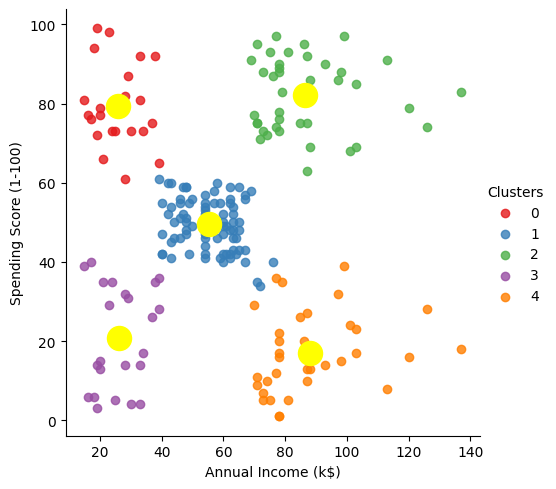

In [31]:
sns.lmplot(data=df,x="Annual Income (k$)", y = "Spending Score (1-100)", 
           fit_reg=False,#no regression line
           hue="Clusters" , palette="Set1")
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],
            s= 300, c="Yellow")

plt.show()

In [32]:
#3rd cluster indicates that their annual income and spending scores are less between 0 to 40 ,cate =sensible_customers.
#4th cluster indicates that their annual income is high but spending score is low, cate=careful_customers.
#1st cluster indicates that their annual income and spending score is moderate , cate = standard_customers.
#0th cluster indicates that their annual income is low and spending is very high , cate = careless_customers.
#2nd cluster indicates that their annual income is high and spending is very high, cate = optimum_customers(target_customers).

In [34]:
#num to cat convergen
df["Clusters"]=df.Clusters.map({0:"Careless",1:"standard",2:"Target",3:"Sensible",4:"Careful"})

In [35]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,Sensible
2,Male,21,15,81,Careless
3,Female,20,16,6,Sensible
4,Female,23,16,77,Careless
5,Female,31,17,40,Sensible


In [36]:
new_df=df[df["Clusters"]=="Target"]

In [37]:
new_df.shape

(39, 5)

In [38]:
new_df

,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
124,Male,39,69,91,Target
126,Female,31,70,77,Target
128,Male,40,71,95,Target
130,Male,38,71,75,Target
132,Male,39,71,75,Target
134,Female,31,72,71,Target
136,Female,29,73,88,Target
138,Male,32,73,73,Target
140,Female,35,74,72,Target


In [40]:
new_df.to_excel(r"TargetCustomers.xlsx",index=True)